DEAP es compatible con Python 2.7 y 3.4 o superior
Recomiendo s que utilice easy_install o pip para instalar DEAP en su sistema. Los administradores de paquetes de Linux como apt-get, yum, etc. 
generalmente brindan una versión desactualizada.

In [1]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 2.0 MB/s eta 0:00:00


importación de las librerias, descripción detallada de cada una de ellas se puede encontrar en:
https://deap.readthedocs.io/en/master/api/index.html

Para el que no tiene conocimientos en la libreria numpy de python recomiendo realizar el siguiente tutorial.

https://web.stanford.edu/~schmit/cme193/lec/lec5.pdf

In [2]:
import operator
import math
import random
import numpy as np 
import pandas as pd 

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [19]:
url="https://drive.google.com/file/d/1a-Zi1mGXr43ng1kR5pRZslPOk8ylEsaU/view?usp=share_link"
data=pd.read_csv(url,delimiter=";")
data.head()

,"<!doctype html><html lang=""en-US"" dir=""ltr""><head><base href=""https://accounts.google.com/v3/signin/""><meta name=""referrer"" content=""origin""><meta name=""viewport"" content=""width=device-width, initial-scale=1""><style data-href=""https://www.gstatic.com/_/mss/boq-identity/_/ss/k=boq-identity.AccountsSignInUi.Tnl5Qva1c4I.L.X.O/am=As45HAAKAAEAFAgAAAAAAAAAgEAYooQ/d=1/ed=1/rs=AOaEmlENumoBAlXqPup3hSI_Y3Y6Kku8MA/m=identifierview,_b,_tp,_r"" nonce=""oHWnJCcJl2TkdgPJPcZyog"">c-wiz{contain:style}c-wiz>c-data{display:none}c-wiz.rETSD{contain:none}c-wiz.Ubi8Z{contain:layout style}@-webkit-keyframes quantumWizBoxInkSpread{0%{-webkit-transform:translate(-50%,-50%) scale(0.2)","-webkit-transform:translate(-50%,-50%) scale(0.2)","-ms-transform:translate(-50%,-50%) scale(0.2)","-o-transform:translate(-50%,-50%) scale(0.2)","transform:translate(-50%,-50%) scale(0.2)}to{-webkit-transform:translate(-50%,-50%) scale(2.2)","-webkit-transform:translate(-50%,-50%) scale(2.2)","-ms-transform:translate(-50%,-50%) scale(2.2)","-o-transform:translate(-50%,-50%) scale(2.2)","transform:translate(-50%,-50%) scale(2.2)}}@keyframes quantumWizBoxInkSpread{0%{-webkit-transform:translate(-50%,-50%) scale(0.2)","-webkit-transform:translate(-50%,-50%) scale(0.2).1",...,-webkit-border-radius:2px.2,-moz-border-radius:2px.2,border-radius:2px.2,bottom:0,"content:"""".7",left:0.4,position:absolute.13,right:0.2,top:0.3,z-index:-1}.JVMrYb{display:block}.hJIRO{display:none}.sQecwc{display:hidden}sentinel{}
0,/*# sourceURL=/_/mss/boq-identity/_/ss/k=boq-i...,font-style:normal,font-weight:400,src:url(//fonts.gstatic.com/s/productsans/v9/p...,"}</style><meta name=""description"" content=""Acc...",url=/ServiceLogin?continue=https://drive.goog...,dsh=S-1240571824:1681741240583307&amp,flowEntry=ServiceLogin&amp,followup=https://drive.google.com/file/d/1a-Zi...,ifkv=AQMjQ7QYawpvnAT-y7HD09ILzn2aUblaORqVcB7EM...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(function(){var k=function(S,E,B,z,P,e,J,t,Z,c...","break a}B=""""}J=-1!=B.indexOf(S)}return E>>1&7|...","P?x():(r=e,e=function(){(r(),O)(x)})}}),J},R=t...","try{P=z.createPolicy(S,{createHTML:h,createScr...","a:{for(var D=R,K=0,C=[""CLOSURE_FLAGS""]",K<C.length,"K++)if(D=D[C[K]],null==D){v=null",break a}v=D}var O=R.requestIdleCallback?functi...,n=null!=q?q:!1,"var m,a,b=R.navigator",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"'(function(){var EN=function(z,B,E,P,t,e,S,J,L...",I<J,"I++)I in L&&e.call(void 0,L[I],I,S)","return(E+z&B)<E&&(E-z|34)>=E&&(this.src=P,this...",S<E.length,"S+=8192)t+=String.fromCharCode.apply(null,E.sl...","P=e(t).replace(/\\+/g,""-"").replace(/\\//g,""_"")...",J=P}if((B+3^22)>=B&&(B-4|66)<B){if(!E)throw Er...,"if(""function""!==typeof P)throw Error(""Invalid ...","}return J},U=function(z,B,E,P,t,e,S,J,L,I,u,f,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Copyright The Closure Library Authors.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPDX-License-Identifier: Apache-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
samples = np.array([data["antiguedad"],data["superficie"]])
values = np.array(data["precio"])
print(samples[:5])
print(values[:5])

[[ 15  20  30  15  12  40  30  27  14  20  22  25  21  33   5  12   6  10
   28  30]
 [120  80 100 180 190 250  99  90  60 100 110 120 180 130  90  50  60  70
  120 130]]
[250 130 165 310 320]


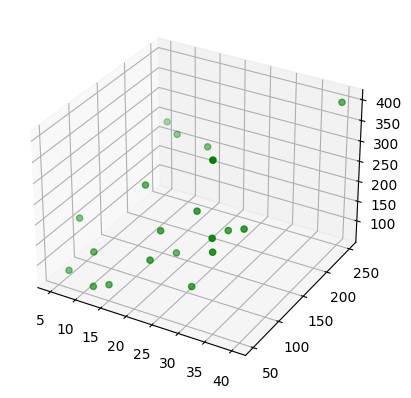

In [5]:
# Modulos con los que trabajaremos
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional
x, y = samples[0], samples[1]
z = values

# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.scatter(x, y, z, c='g', marker='o', )

# Mostramos el gráfico
plt.show()

La redefinición de la división se realiza para protegerla contra un error de división por cero (que bloquearía el programa). Las otras funciones son simplemente un mapeo del operatormódulo de Python. El número que sigue a la función es la aridad de la primitiva, es decir, el número de entradas que toma

In [6]:
def protectedDiv(left, right):
  try:
    return left / right
  except ZeroDivisionError:
    return 1

 Las siguientes tres líneas agregan funciones como primitivas. El primer argumento es la función a sumar y el segundo argumento la función aridad . La última línea agrega una terminal constante. Actualmente, los nombres predeterminados para los argumentos son "ARG0"y "ARG1". Para cambiarlo a "x"y "y", simplemente llame pset.renameArguments(ARG0='x')

Puede consultar informacion adicional:
https://deap.readthedocs.io/en/master/tutorials/advanced/gp.html

Tambien puede utilizar la libreria operators de python

https://docs.python.org/3/library/operator.html

In [7]:
def cuadrado(x):
  return x*x  

In [8]:
pset = gp.PrimitiveSet("MAIN", 2) #Entrada: Antiguedad y Superficie
pset.addPrimitive(np.add, 2, name="vadd")
pset.addPrimitive(np.subtract, 2, name="vsub")
pset.addPrimitive(np.multiply, 2, name="vmul")
pset.addPrimitive(np.negative, 1, name="vneg")
#pset.addPrimitive(cuadrado, 1, name="vpow2") #definir la propia funcion
pset.addPrimitive(np.cos, 1, name="vcos")
pset.addPrimitive(np.sin, 1, name="vsin")
pset.addTerminal(1, name="vone")
pset.renameArguments(ARG0='x') #superficie  
pset.renameArguments(ARG1='y') #antiguedad

Como cualquier programa evolutivo, la regresión simbólica necesita (al menos) dos tipos de objetos: un individuo que contenga el genotipo y una aptitud. Podemos crearlos fácilmente con el creador:

In [9]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) #FitnessMin nombrecualquiera
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin) #inidividuos, arbol, minimizar

Primero, se crea una instancia de caja de herramientas (en algunos tipos de problemas como la coevolución, puede considerar crear más de una caja de herramientas). Entonces, podemos registrar cualquier parámetro. Las primeras líneas registran cómo crear un individuo (llamando a gp.genHalfAndHalf con el conjunto primitivo previamente definido) y cómo crear la población (repitiendo la inicialización del individuo).

In [10]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=2, max_=9) #expresion, metodo crear algoritmo genetico, min y max arbol
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

Devuelve un número de muestras espaciadas uniformemente, calculadas sobre el intervalo [ start , stop ]

Ahora podemos introducir la función de evaluación, que recibirá un individuo como entrada y devolverá la aptitud correspondiente

In [11]:
def evalSymbReg(individual):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Evaluate the sum of squared difference between the expression
    # and the real function values : x**4 + x**3 + x**2 + x 
    diff = np.sum((func(samples[0], samples[1]) - values)**2) / len(samples)
    return np.sqrt(abs(diff)),

Posteriormente, registramos la función de evaluación. También elegimos el método de selección (un torneo de tamaño 3), el método de pareja (cruce de un punto con probabilidad uniforme en todos los nodos) y el método de mutación (una mutación de probabilidad uniforme que puede agregar un nuevo subárbol completo a un nodo).



In [12]:
toolbox.register("evaluate", evalSymbReg)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2) #maxmo dos cambios en la mutacion
toolbox.register('mutate', gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [13]:
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=7))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=7))

finalizamos creando la población y luego llamando a un algoritmo completo. En este caso, usaremos eaSimple().

Se configuran otros parametros como la semilla del generador de números aleatorios, el tamaño de la población  y las estadísticas que permitirán verificar el algoritmo de evolución

In [14]:
def main():
    random.seed(12345678)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std) 
    stats.register("min", np.min)
    stats.register("max", np.max)

    algorithms.eaSimple(pop, toolbox, 0.6, 0.8, 300, stats, halloffame=hof)
   
    return pop, stats, hof

if __name__ == "__main__":
    p,s,h=main()
    print(h[0])

gen	nevals	avg        	std        	min   	max        
0  	300   	1.06932e+11	1.84839e+12	193.95	3.20686e+13
1  	273   	991.893    	3981.05    	201.117	67923.7    
2  	283   	2649.23    	20931.8    	144.372	349533     
3  	271   	2910.07    	13443.3    	168.51 	136581     
4  	282   	2716.61    	21779.8    	143.454	338368     
5  	281   	1552.68    	7414.95    	152.726	68357      
6  	285   	8079.71    	118254     	152.866	2.04951e+06
7  	276   	3659.8     	26850.6    	152.87 	378201     
8  	271   	1775.9     	8791.97    	152.48 	68300      
9  	273   	52845.6    	804517     	151.057	1.38579e+07
10 	268   	3862.14    	29391.7    	150.816	349583     
11 	272   	1643.66    	8784.93    	146.253	68594.3    
12 	274   	1531.35    	8359.75    	150.396	79565.4    
13 	273   	2383.38    	13409.7    	150.396	135945     
14 	272   	96311.7    	1.59784e+06	150.121	2.7716e+07 
15 	278   	1032.45    	5479.13    	150.121	67354.1    
16 	282   	3098.99    	22686      	150.903	349004     
17 	270   	1

In [15]:
def extractZ(individual):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Evaluate the sum of squared difference between the expression
    # and the real function values : x**4 + x**3 + x**2 + x     
    return func(samples[0], samples[1]) 

In [16]:
z2 = extractZ(h[0])

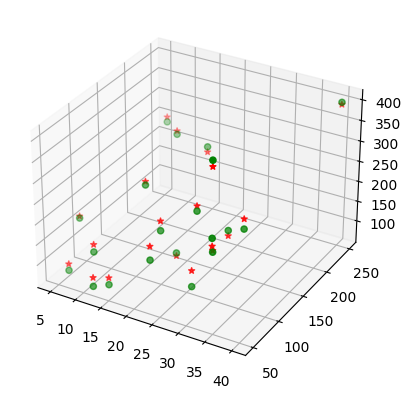

In [17]:
# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional
x, y = samples[0], samples[1]
z = values

# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.scatter(x, y, z, c='g', marker='o', ) # sample original 
ax1.scatter(x, y, z2, c='r', marker='*', ) # respuestas generadas 
# Mostramos el gráfico
plt.show()

In [18]:
sol = h[0]
print(sol)
func = toolbox.compile(expr=sol)
print(func(8,122))

vsub(vmul(vcos(vadd(vcos(vsub(vcos(y), vneg(x))), y)), vadd(vadd(vadd(vadd(x, vone), vsub(vadd(x, x), vone)), vmul(vsin(x), x)), vmul(vsin(vmul(vadd(y, x), vadd(x, y))), vadd(x, vadd(vsin(vone), x))))), vadd(vadd(vcos(vone), vsub(vsub(vmul(x, vone), y), vsub(vsin(y), vneg(y)))), vmul(vcos(y), vcos(y))))
219.95180827416587
